# Modelos ML

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import statistics
from math import sqrt

from sklearn.datasets import load_breast_cancer, load_diabetes

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold

from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
d = load_breast_cancer()
X = pd.DataFrame(d['data'], columns=d['feature_names']).astype(float)
y = d['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
def imprime_resultado(results):
    mean = results['test_score'].mean()
    std = results['test_score'].std()
    ic = '[%.2f, %.2f] ' % ((mean - 2 * std) * 100, (mean + 2 * std) * 100 if mean + 2 * std < 1 else 100)
    return mean, ic

#def model_ML(classifier, args):
#    if not args:
#        model = classifier()
#    else:
#        model = classifier(**args)
#            
#    model.fit(
#        X_train,
#        y_train
#    )
#    
#    y_pred = model.predict(X_test)
#
#    #print(classification_report(y_test, y_pred))
#
#    return np.round(accuracy_score(y_test, y_pred), decimals=6)

def model_ML_CV(classifier, args):
        if not args:
            model = classifier()
        else:
            model = classifier(**args)

        cv = StratifiedKFold(n_splits = 10, shuffle=True)
        results = cross_validate(model, X, y, cv=cv, return_train_score=False)
        return results['test_score']


def plot_confidence_interval(x, values, z=1.96, color='#2187bb', horizontal_line_width=0.25):
        mean = statistics.mean(values)
        stdev = statistics.stdev(values)
        confidence_interval = z * stdev / sqrt(len(values))
        
        left = x - horizontal_line_width / 2
        top = mean - confidence_interval
        right = x + horizontal_line_width / 2
        bottom = mean + confidence_interval
        plt.plot([x, x], [top, bottom], color=color)
        plt.plot([left, right], [top, top], color=color)
        plt.plot([left, right], [bottom, bottom], color=color)
        plt.plot(x, mean, 'o', color='#f44336')
        
        return mean, confidence_interval

In [4]:
random_state = 42

modelosML = {
    'KNeighbors': {
        'classifier': KNeighborsClassifier,
        'args': {
            'n_neighbors' : 2
        }
    },
    'Naïve Bayes':{
        'classifier': GaussianNB,
        'args': None
    },
    'SVM': {
        'classifier': svm.SVC,
        'args': {
            'kernel': 'linear'
        }
    },
    'Logistic Regression': {
        'classifier': LogisticRegression,
        'args': {
            'solver': 'lbfgs',
            'max_iter': 3000
        }
    },
    'Decision Tree': { 
        'classifier': DecisionTreeClassifier,
        'args': {
            'criterion': 'entropy',
            'random_state': random_state
        }
    }, 
    'Random Forest': { 
        'classifier': RandomForestClassifier,
        'args': None
    },
    'Gradient Boosting': {
        'classifier': GradientBoostingClassifier,
        'args': {
            'random_state': random_state
        }
    },
    'XGBoost': {
        'classifier': XGBClassifier,
        'args': None
    }
}

In [5]:
#def main():
#    df = pd.DataFrame(columns=['Modelo', 'Acurácia'])
#    for k in modelosML.keys():
#        results = {
#            'Modelo': k,
#            'Acurácia': model_ML(**modelosML[k])
#        }
#        df_temp = pd.DataFrame([results])
#        df = pd.concat([df, df_temp])
#    print(df.to_string(index=False))
    
def main():
    df = pd.DataFrame(columns=['Modelo', 'Valores'])
    for k in modelosML.keys():
        results = {
            'Modelo': k,
            'Valores' : model_ML_CV(**modelosML[k])
        }
        df_temp = pd.DataFrame([results])
        df = pd.concat([df, df_temp])
    
    print(df['Modelo'].values.tolist())
    plt.rcParams["figure.figsize"] = (15, 6)
    plt.xticks([i+1 for i in range(len(df))], df['Modelo'].values.tolist())
    plt.title('Confidence Interval')
    i = 1
    for _, row in df.iterrows():
        plot_confidence_interval(i, row['Valores'])
        i+= 1
    plt.show()

['KNeighbors', 'Naïve Bayes', 'SVM', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']


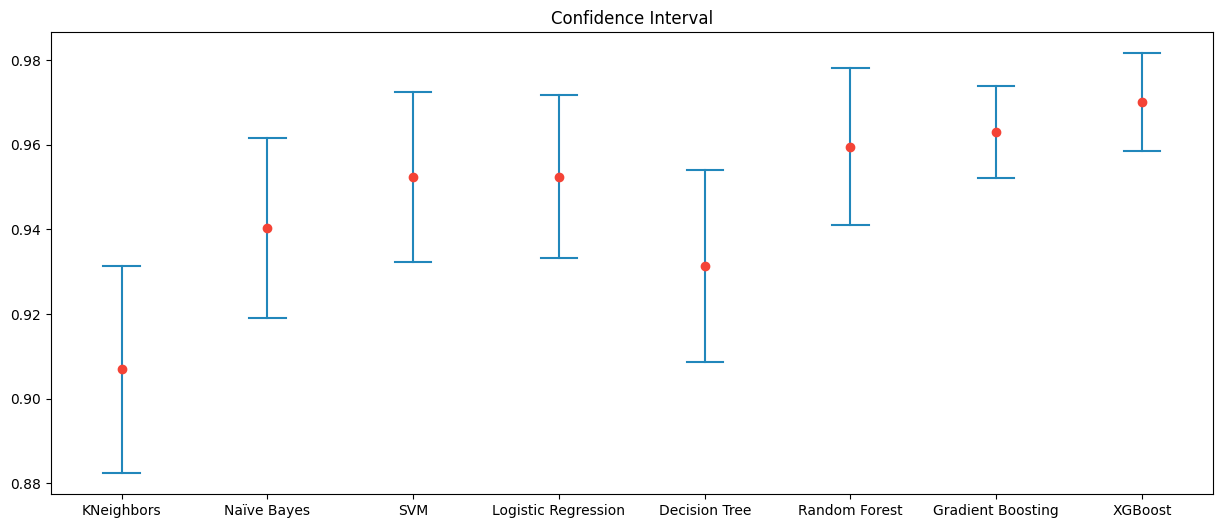

In [6]:
main()

In [ ]:
XGBoost

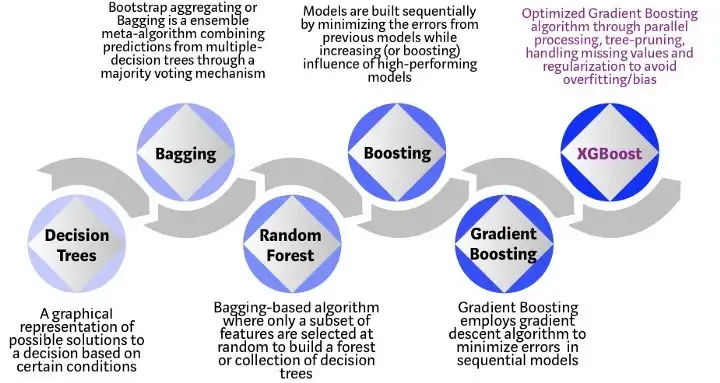

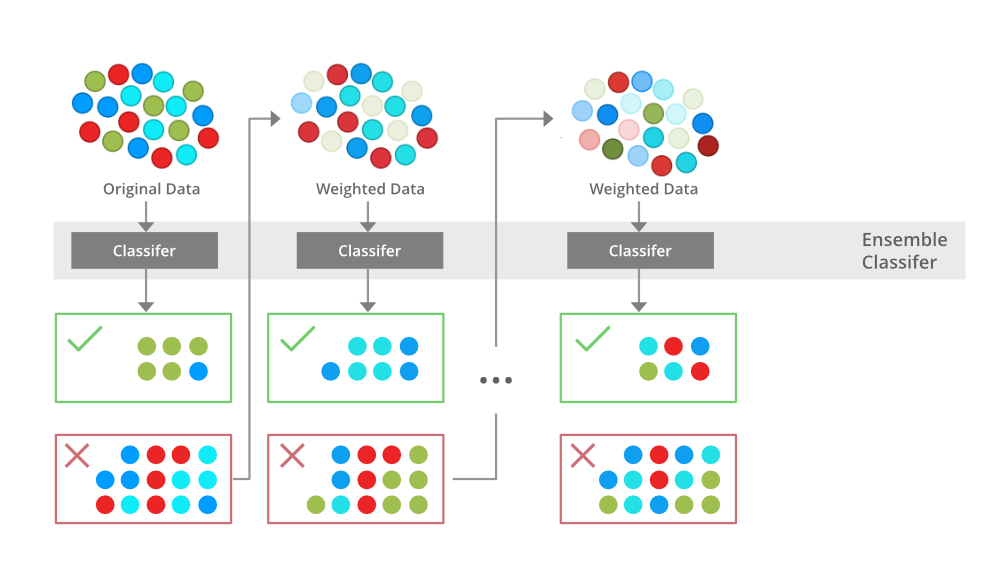

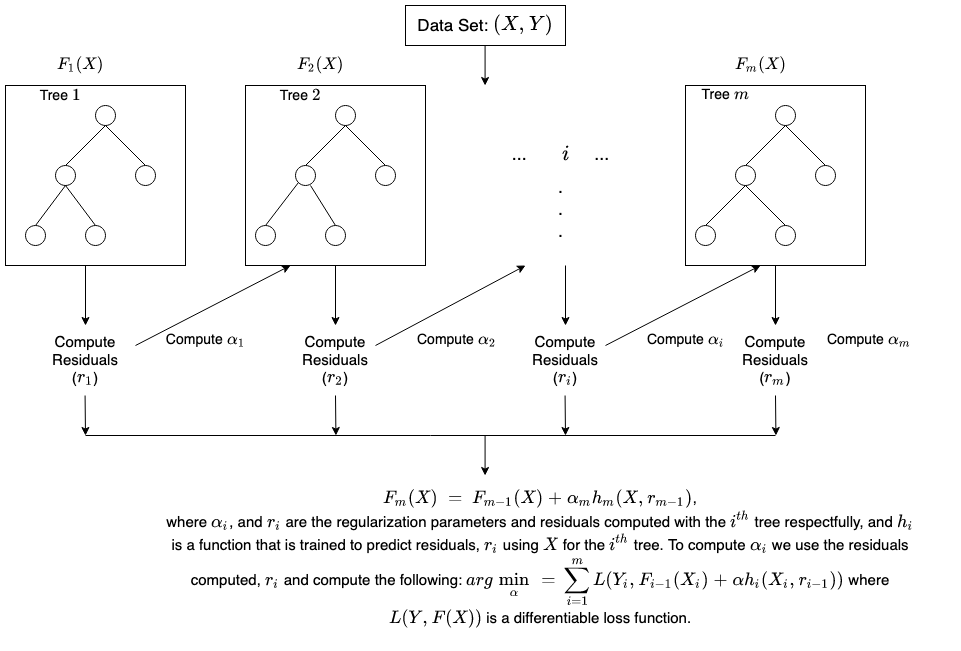